<a href="https://colab.research.google.com/github/SAJQDQ/CV3/blob/main/cv3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [2]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()
assert x_train.shape == (50000, 32, 32, 3)
assert x_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 [==============================] - 6s 0us/step


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

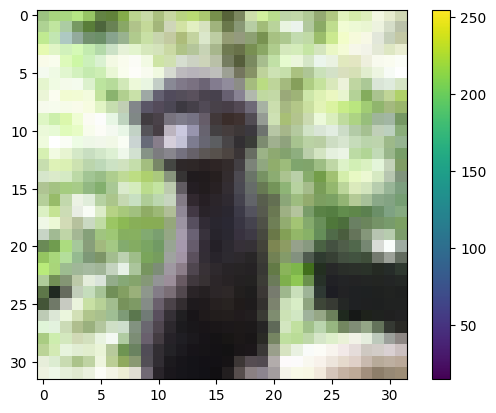

In [4]:
plt.figure()
plt.imshow(x_train[55])
plt.colorbar()
plt.grid(False)

In [5]:
x_train = x_train/ 255
x_test = x_test/ 255

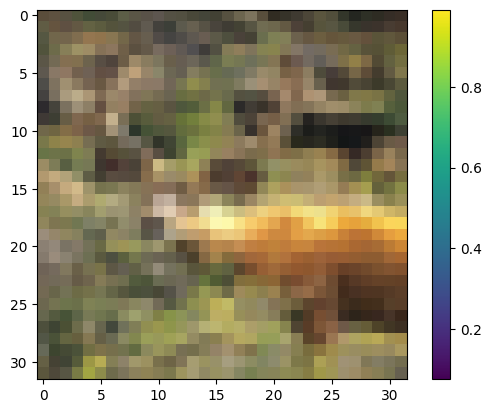

In [7]:
plt.figure()
plt.imshow(x_train[98])
plt.colorbar()
plt.grid(False)

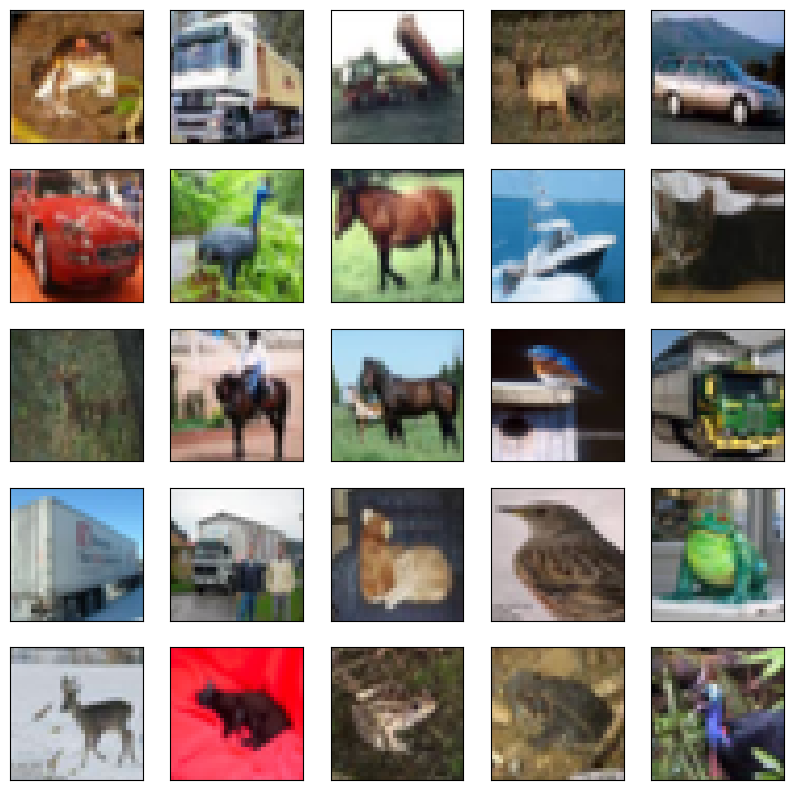

In [8]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap = plt.cm.binary)

In [9]:
model = keras.Sequential([
                          keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
                          keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)),
                          keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
                          keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
                          keras.layers.Conv2D(128, (3, 3), padding='same', activation="relu"),
                          keras.layers.MaxPooling2D(pool_size=(2, 2), strides=2),
                          keras.layers.Flatten(),
                          keras.layers.Dense(128, activation='relu'),
                          keras.layers.Dense(10, activation="softmax")
])

In [10]:
model.compile(optimizer=tf.keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 8, 8, 128)         1

In [12]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 459s 293ms/step - loss: 1.9905 - accuracy: 0.2829
Epoch 2/10
1563/1563 [==============================] - 456s 292ms/step - loss: 1.5364 - accuracy: 0.4511
Epoch 3/10
1563/1563 [==============================] - 460s 294ms/step - loss: 1.3377 - accuracy: 0.5229
Epoch 4/10
1563/1563 [==============================] - 453s 290ms/step - loss: 1.1981 - accuracy: 0.5755
Epoch 5/10
1563/1563 [==============================] - 455s 291ms/step - loss: 1.0759 - accuracy: 0.6218
Epoch 6/10
1563/1563 [==============================] - 448s 287ms/step - loss: 0.9777 - accuracy: 0.6575
Epoch 7/10
1563/1563 [==============================] - 447s 286ms/step - loss: 0.8903 - accuracy: 0.6883
Epoch 8/10
1563/1563 [==============================] - 447s 286ms/step - loss: 0.8152 - accuracy: 0.7146
Epoch 9/10
1563/1563 [==============================] - 446s 285ms/step - loss: 0.7488 - accuracy: 0.7404
Epoch 10/10
1563/1563 [=======================

In [13]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

313/313 [==============================] - 23s 71ms/step - loss: 0.8317 - accuracy: 0.7117
Test loss: 0.8316760659217834
Test accuracy: 0.7117000222206116


In [14]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 119s 76ms/step


In [15]:
predictions[0]

array([2.28139572e-04, 1.40166128e-04, 1.98853146e-02, 1.23192824e-01,
       4.01615091e-02, 1.84749626e-02, 7.49540150e-01, 4.82888818e-02,
       7.85367447e-05, 9.37832010e-06], dtype=float32)

In [16]:
np.argmax(predictions[0])

6

In [23]:
y_train[114]

array([7], dtype=uint8)

Text(0.5, 0, '[7]')

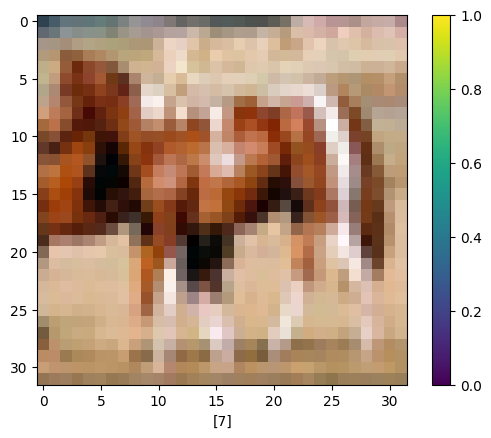

In [24]:
plt.figure()
plt.imshow(x_train[114])
plt.colorbar()
plt.grid(False)
plt.xlabel(y_train[114])